In [ ]:
# The purpose of this notebook is to investigate recent crypto currency trends; namely, I'm looking to better understand
# the relationship between bitcoin/ethereum and "alt coins"; the premise is to give a high-level overview regarding absolute and relative 
# price appreciation over the past decade or so between all digital assets available. 
# One could assume that alt coins are inherently more risky due to how mainstream investors view them.. 
# which is equivocal to penny stocks; there is a level of obscurity with regard to the governing, underlying technology
# that drives a large amount of the speculation of crypto, but moreso with alt coins

# There are levels to different asset classes, but it makes sense to investigate, on a granular level, if investing in 
# a basket of alt coins can be more fruitful than just putting money into the main 2: ethereum and bitcoin

# This notebook is only meant to give a 30,000 ft view of the crpyto landscape; something to consider is that 
# a majority of the crypto currencies included in this analysis only have 1-2 years worth of price history.
# Additionally, this list only comprises a small fraction of all cryptocurrencies available; again, I'm just trying 
# to find a higher trend in the digital asset space

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas.plotting import scatter_matrix
import datetime

crypto_data = pd.read_csv('ALL_COMBINED.csv')
print(crypto_data.shape)
crypto_data.head(5)

(53777, 8)


,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
0,Aave,2018-01-30,0.15,0.17,0.17,0.14,530470.0,-7.95
1,Aave,2018-01-31,0.14,0.15,0.15,0.13,396050.0,-11.10
2,Aave,2018-02-01,0.11,0.14,0.14,0.11,987260.0,-17.46
3,Aave,2018-02-02,0.10,0.11,0.11,0.08,1810000.0,-8.32
4,Aave,2018-02-03,0.11,0.10,0.12,0.09,1200000.0,6.85


In [2]:
# Aave, Maker and Cardano are erroneous, so I will remove those cryptocurrencies
# additionally, I'm removing the proxies for fiat currency (USD_Coin, Tether and Dai)
crypto_data = crypto_data.drop(crypto_data[(crypto_data.Currency_Name == 'Aave') | (crypto_data.Currency_Name == 'Maker') | (crypto_data.Currency_Name == 'Cardano')
                                           | (crypto_data.Currency_Name == 'Tether') | (crypto_data.Currency_Name == 'USD_Coin') | (crypto_data.Currency_Name == 'Dai')
                                           | (crypto_data.Currency_Name == 'Filecoin')].index)
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])
crypto_data.head(5)

# confirmation of the deleted items

,Currency_Name,Date,Price,Open,High,Low,Vol.,Change %
1275,Algorand,2019-07-25,0.6102,0.5983,0.6148,0.5860,4750000.0,1.95
1276,Algorand,2019-07-26,0.6503,0.6103,0.7111,0.5940,8950000.0,6.57
1277,Algorand,2019-07-27,0.5788,0.6501,0.6673,0.5728,9090000.0,-10.99
1278,Algorand,2019-07-28,0.5759,0.5788,0.5992,0.5584,11050000.0,-0.50
1279,Algorand,2019-07-29,0.5710,0.5770,0.5934,0.5546,11030000.0,-0.85


In [3]:
crypto_data.dtypes

Currency_Name            object
Date             datetime64[ns]
Price                   float64
Open                    float64
High                    float64
Low                     float64
Vol.                    float64
Change %                float64
dtype: object

In [4]:
crypto_data.describe()

,Price,Open,High,Low,Vol.,Change %
count,44737.000000,44737.000000,44737.000000,44737.000000,4.473700e+04,44737.000000
mean,906.535430,904.603756,935.722725,870.092995,4.414817e+09,1.637766
std,5227.935698,5218.437894,5394.781428,5018.048011,9.631202e+10,204.407048
min,0.000006,0.000000,0.000006,-6.503000,0.000000e+00,-98.870000
25%,0.277630,0.277510,0.291730,0.265480,1.878400e+05,-2.710000
50%,4.410000,4.400000,4.624900,4.185600,2.720000e+06,0.000000
75%,74.600000,74.400000,77.660000,71.638000,4.781000e+07,3.030000
max,63545.110000,63544.200000,64831.500000,62067.500000,8.574631e+12,42751.340000


In [5]:
# a nice list of different digital assets spanning across the holistic spectrum (blockchain, data integration (3rd party and block chain via smart)
# contracts and unique, niche projects such as Tronix (gaming sector))
crypto_list = list(crypto_data.Currency_Name.unique())
crypto_list.remove('Bitcoin')
print(len(crypto_list))
crypto_list

42


['Algorand',
 'Avalanche',
 'Axie_Infinity',
 'Binance_Coin',
 'Binance_USD',
 'Bitcoin_BEP2',
 'Bitcoin_Cash',
 'Bitcoin_SV',
 'BitTorrent',
 'Chainlink',
 'Cosmos',
 'Crypto.com_Coin',
 'Dash',
 'Dogecoin',
 'Elrond',
 'EOS',
 'Ethereum',
 'Ethereum_Classic',
 'FTX_Token',
 'GRT',
 'ICP',
 'IOTA',
 'Klaytn',
 'Kusama',
 'LEO',
 'Litecoin',
 'Monero',
 'Neo',
 'PancakeSwap',
 'Polkadot',
 'Polygon',
 'SHIBA_INU',
 'Solana',
 'Stellar',
 'Tezos',
 'THETA',
 'Tron',
 'Uniswap',
 'VeChain',
 'Waves',
 'WBTC',
 'XPR']

In [6]:
# clean dataset
print(crypto_data.isna().sum().sort_values(ascending = False))

Change %         0
Vol.             0
Low              0
High             0
Open             0
Price            0
Date             0
Currency_Name    0
dtype: int64


In [7]:
# some initial questions to consider:
# 1) What is the ranking in terms of % appreciation from min to max value (on an annual basis)
# 2) While price is important, market cap typically dominates growth; how does that impact price?
# 3) Which coins present the best forward opp. (relative performance to btc is important here); for this analysis, I will 
# simply look at the best performing crypto currencies on an annual basis
# there are a lot of questions to be asked here, but for the sake of time, I will limit my questions to 3


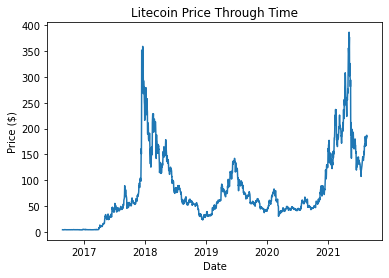

In [8]:
# visualizing Litecoin through Time
litecoin = pd.DataFrame(crypto_data[crypto_data['Currency_Name']=='Litecoin'])
plt.plot(litecoin.Date, litecoin.Price)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title('Litecoin Price Through Time')
plt.show()


In [9]:
# starting on Q1
df_group = crypto_data.groupby('Currency_Name')
df_group_summary = df_group.describe()
df_group_summary.columns

MultiIndex([(   'Price', 'count'),
            (   'Price',  'mean'),
            (   'Price',   'std'),
            (   'Price',   'min'),
            (   'Price',   '25%'),
            (   'Price',   '50%'),
            (   'Price',   '75%'),
            (   'Price',   'max'),
            (    'Open', 'count'),
            (    'Open',  'mean'),
            (    'Open',   'std'),
            (    'Open',   'min'),
            (    'Open',   '25%'),
            (    'Open',   '50%'),
            (    'Open',   '75%'),
            (    'Open',   'max'),
            (    'High', 'count'),
            (    'High',  'mean'),
            (    'High',   'std'),
            (    'High',   'min'),
            (    'High',   '25%'),
            (    'High',   '50%'),
            (    'High',   '75%'),
            (    'High',   'max'),
            (     'Low', 'count'),
            (     'Low',  'mean'),
            (     'Low',   'std'),
            (     'Low',   'min'),
            (     'L

In [10]:
df_group_summary.head()

Price                                                       \
                count       mean         std      min        25%       50%   
Currency_Name                                                                
Algorand        757.0   0.526635    0.378497   0.1265   0.243100   0.33530   
Avalanche       243.0  21.386255   11.133217   2.9000  12.195000  18.26000   
Axie_Infinity    34.0  54.529085   15.347562  24.8001  42.554625  45.14655   
Binance_Coin   1385.0  66.616253  129.153911   1.4900  12.160000  17.37000   
Binance_USD     124.0   0.999558    0.000465   0.9980   0.999300   0.99970   

                                      Open             ...          Vol.  \
                     75%       max   count       mean  ...           75%   
Currency_Name                                          ...                 
Algorand        0.810400    1.6957   757.0   0.525908  ...  5.490000e+06   
Avalanche      30.055000   54.9800   243.0  21.214979  ...  3.305000e+06   
Axie_Infinity  68.984825   77.3631    34.0  52.925959  ...  1.492250e+07   
Binance_Coin   29.460000  676.5600  1385.0  66.263386  ...  4.690000e+06   
Binance_USD     0.999900    1.0003   124.0   0.999568  ...  1.400000e+09   

                            Change %                                           \
                        max    count      mean        std    min    25%   50%   
Currency_Name                                                                   
Algorand       4.760000e+07    757.0  0.347939   7.190976 -50.11 -3.590  0.00   
Avalanche      1.328000e+07    243.0  1.642305  10.482040 -37.20 -4.145  0.63   
Axie_Infinity  4.837000e+07     34.0  4.503235  15.328988 -11.15 -2.830  0.30   
Binance_Coin   2.431000e+07   1385.0  0.618101   6.792788 -44.08 -2.360  0.16   
Binance_USD    4.840000e+09    124.0 -0.000242   0.034699  -0.12 -0.020  0.00   

                              
                  75%    max  
Currency_Name                 
Algorand       4.1400  44.48  
Avalanche      5.7800  74.32  
Axie_Infinity  4.7175  71.77  
Binance_Coin   3.0600  69.99  
Binance_USD    0.0200   0.16  

[5 rows x 48 columns]

In [11]:
df_group_summary['Max_Min_Diff'] = df_group_summary[('Price',   'max')] - df_group_summary[('Price',   'min')]
df_group_summary['frac_from_low_to_max'] = (df_group_summary['Max_Min_Diff']/df_group_summary[('Price',   'min')])
df_group_summary['Max_Price'] = df_group_summary[('Price',   'max')]
df_group_summary['Min_Price'] = df_group_summary[('Price',   'min')]

In [12]:
# sample graph showcasing the max, min and % gain from low to max
df_price_change = df_group_summary[['Max_Price','Min_Price','Max_Min_Diff','frac_from_low_to_max']]
df_price_change.columns = df_price_change.columns.get_level_values(0)
df_price_change['%_from_low_to_max'] = df_price_change['frac_from_low_to_max'].map(lambda n: '{:,.2%}'.format(n))
print(df_price_change.columns)

Index(['Max_Price', 'Min_Price', 'Max_Min_Diff', 'frac_from_low_to_max',
       '%_from_low_to_max'],
      dtype='object')


<ipython-input-12-66de5caba92f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_change['%_from_low_to_max'] = df_price_change['frac_from_low_to_max'].map(lambda n: '{:,.2%}'.format(n))


In [13]:
# 2) calculating max, fully diluted market capitalization based on the total max supply (could just get this via an API, but I'll map manually)
# for the coins that have an infinite supply available, I will substitute in their current circulating supply (e.g. dogecoin)

max_supply = {'Algorand': 10000000000,'Avalanche':720000000,'Axie_Infinity':270000000,
              'Binance_Coin':168137036,'Binance_USD':12371273592,'Bitcoin':21000000,'Bitcoin_BEP2':21000000, 
              'Bitcoin_Cash':21000000,'Bitcoin_SV':21000000,'BitTorrent':990000000000,'Chainlink':1000000000,
              'Cosmos':242617328,'Crypto.com_Coin':30263013692,'Dai':6281193055,'Dash':18900000,'Dogecoin':131282808198,
              'Elrond':31415926,'EOS':1000000000,'Ethereum_Classic':210700000,'Ethereum':117523288.1,'Filecoin':2000000000,
              'FTX_Token':325170015,'GRT':10057044431,'ICP':469213710,'IOTA':2779530283,'Klaytn':10671234074,
              'Kusama':9651217,'LEO':985236054,'Litecoin':84000000,'Monero':17992848,'Neo':100000000,'PancakeSwap':228227379,
              'Polkadot':1103303471,'Polygon':10000000000,'SHIBA_INU':1000000000000000,'Solana':504095659,'Stellar':50001806812,
              'Tether':71362085236,'Tezos':888943683,'THETA':1000000000,'Tron':100850743812,'Uniswap':1000000000,'USD_Coin':29332671613,
              'VeChain':86712634466,'Waves':106167832,'WBTC':205871,'XPR':10000000000}
df_price_change['Total_Supply'] = df_price_change.index.map(max_supply)
df_price_change['Highest_Diluted_Market_Cap (Billions)'] = df_price_change.Max_Price * df_price_change.Total_Supply / 1000000000
df_price_change.sort_values('frac_from_low_to_max', ascending = False).head(50)

<ipython-input-13-4758d0480564>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_change['Total_Supply'] = df_price_change.index.map(max_supply)
<ipython-input-13-4758d0480564>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_change['Highest_Diluted_Market_Cap (Billions)'] = df_price_change.Max_Price * df_price_change.Total_Supply / 1000000000


,Max_Price,Min_Price,Max_Min_Diff,frac_from_low_to_max,%_from_low_to_max,Total_Supply,Highest_Diluted_Market_Cap (Billions)
Currency_Name,,,,,,,
Bitcoin,63540.900000,0.100000,63540.800000,635408.000000,"63,540,800.00%",2.100000e+07,1334.358900
Elrond,238.000000,0.010000,237.990000,23799.000000,"2,379,900.00%",3.141593e+07,7.476990
Monero,483.687000,0.099000,483.588000,4884.727273,"488,472.73%",1.799285e+07,8.702907
VeChain,8.168000,0.002260,8.165740,3613.159292,"361,315.93%",8.671263e+10,708.268798
Dogecoin,0.686880,0.000774,0.686106,886.441860,"88,644.19%",1.312828e+11,90.175535
XPR,2.780000,0.003560,2.776440,779.898876,"77,989.89%",1.000000e+10,27.800000
Ethereum,4167.780000,6.700000,4161.080000,621.056716,"62,105.67%",1.175233e+08,489.811210
Stellar,0.886000,0.001720,0.884280,514.116279,"51,411.63%",5.000181e+10,44.301601
Binance_Coin,676.560000,1.490000,675.070000,453.067114,"45,306.71%",1.681370e+08,113.754793


In [14]:
bitcoin = ['Bitcoin']
list_1 = crypto_list[0:11] + bitcoin
list_2 = crypto_list[11:22] + bitcoin
list_3 = crypto_list[22:33] + bitcoin
list_4 = crypto_list[33:43] + bitcoin
print(list_1)

['Algorand', 'Avalanche', 'Axie_Infinity', 'Binance_Coin', 'Binance_USD', 'Bitcoin_BEP2', 'Bitcoin_Cash', 'Bitcoin_SV', 'BitTorrent', 'Chainlink', 'Cosmos', 'Bitcoin']


In [15]:
crypto_data_1 = crypto_data[crypto_data['Currency_Name'].isin(list_1)]
crypto_data_2 = crypto_data[crypto_data['Currency_Name'].isin(list_2)]
crypto_data_3 = crypto_data[crypto_data['Currency_Name'].isin(list_3)]
crypto_data_4 = crypto_data[crypto_data['Currency_Name'].isin(list_4)]
print(crypto_data_1.shape,crypto_data_2.shape, crypto_data_3.shape, crypto_data_4.shape )

(12136, 8) (16441, 8) (12802, 8) (15526, 8)


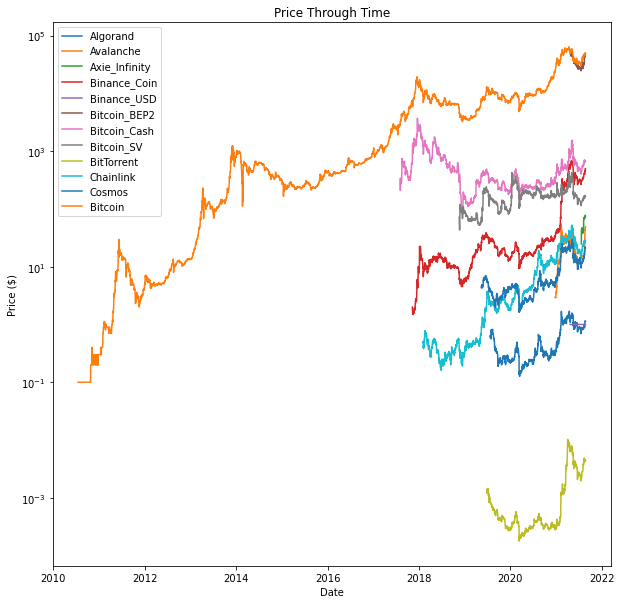

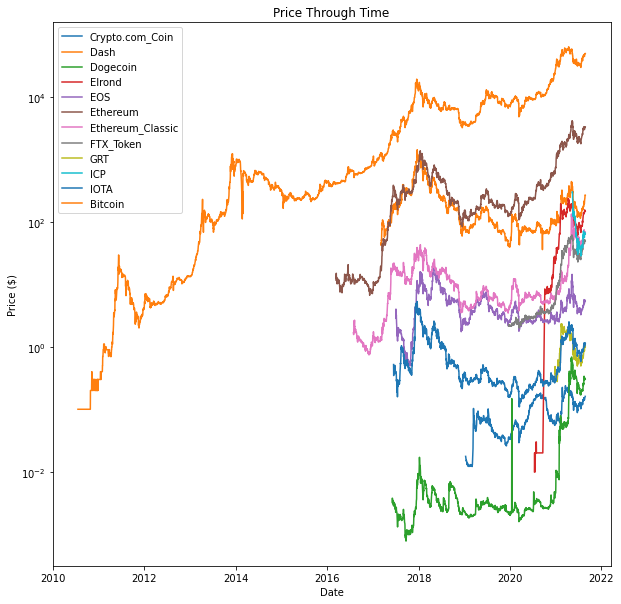

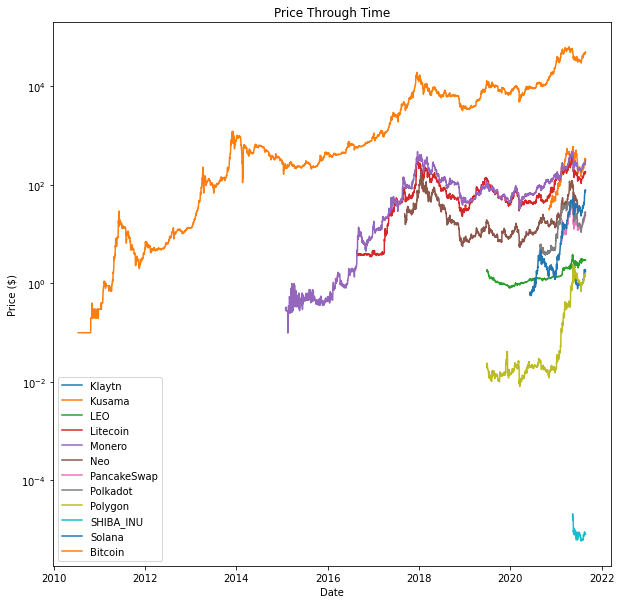

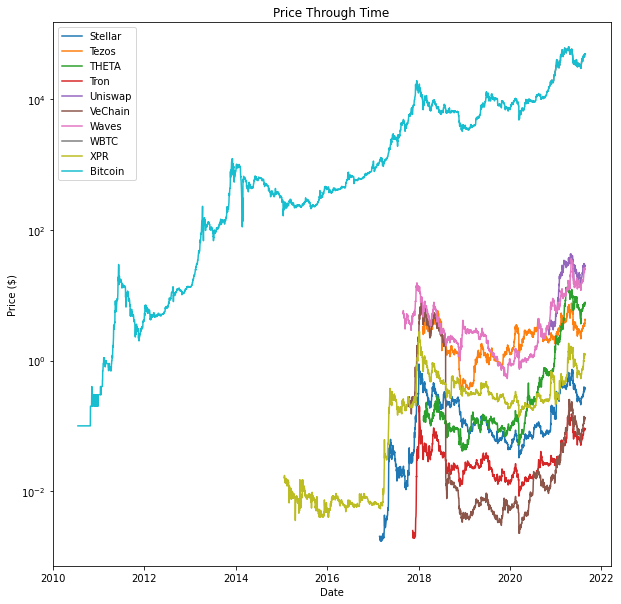

In [16]:
# as you will see from the graphs below, general strength/weakness in bitcoin is a signal for alt coins to 
# act accordingly; next, I will investigate annual returns for each coin to better understand relative performance

plt.figure(figsize=(10,10))
plt.yscale('log')
for i in range(0,len(list_1)):
    x = crypto_data[crypto_data['Currency_Name'] == list_1[i]]
    plt.plot(x.Date, x.Price)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title('Price Through Time')
plt.legend(list_1)
plt.show()

plt.figure(figsize=(10,10))
plt.yscale('log')
for i in range(0,len(list_2)):
    x = crypto_data[crypto_data['Currency_Name'] == list_2[i]]
    plt.plot(x.Date, x.Price)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title('Price Through Time')
plt.legend(list_2)
plt.show()

plt.figure(figsize=(10,10))
plt.yscale('log')
for i in range(0,len(list_3)):
    x = crypto_data[crypto_data['Currency_Name'] == list_3[i]]
    plt.plot(x.Date, x.Price)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title('Price Through Time')
plt.legend(list_3)
plt.show()

plt.figure(figsize=(10,10))
plt.yscale('log')
for i in range(0,len(list_4)):
    x = crypto_data[crypto_data['Currency_Name'] == list_4[i]]
    plt.plot(x.Date, x.Price)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title('Price Through Time')
plt.legend(list_4)
plt.show()

In [17]:
crypto_date_max = max(crypto_data.Date)
print(crypto_date_max)

#df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

2021-08-24 00:00:00


In [18]:
# will miss the inagural year for each crypto, but this is merely for fun
crypto_data_ann = crypto_data[(crypto_data.Date == '2010-01-01') | 
                                          (crypto_data.Date == '2011-01-01') | 
                                          (crypto_data.Date == '2012-01-01') | 
                                          (crypto_data.Date == '2013-01-01') | 
                                          (crypto_data.Date == '2014-01-01') | 
                                          (crypto_data.Date == '2015-01-01') | 
                                          (crypto_data.Date == '2016-01-01') |
                                          (crypto_data.Date == '2017-01-01') | 
                                          (crypto_data.Date == '2018-01-01') | 
                                          (crypto_data.Date == '2019-01-01') | 
                                          (crypto_data.Date == '2020-01-01') | 
                                          (crypto_data.Date == '2021-01-01') |
                                          (crypto_data.Date == '2021-08-24')]

crypto_data_ann.drop('Change %', axis = 1, inplace = True)
crypto_data_ann.head(10)


/Users/alexanderblaies/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Currency_Name,Date,Price,Open,High,Low,Vol.
1435,Algorand,2020-01-01,0.2198,0.2169,0.2269,0.2159,1330000.0
1799,Algorand,2021-01-01,0.3980,0.3356,0.4053,0.3356,5490000.0
2031,Algorand,2021-08-24,1.1347,1.1562,1.1628,1.1124,58000.0
2039,Avalanche,2021-01-01,3.6500,3.1700,3.6900,3.0600,3820000.0
2274,Avalanche,2021-08-24,49.2000,46.4300,51.0400,44.2500,7940000.0
2308,Axie_Infinity,2021-08-24,75.0122,77.3601,77.5097,74.6951,1740000.0
2362,Binance_Coin,2018-01-01,8.4500,8.5300,8.7000,7.8000,642510.0
2727,Binance_Coin,2019-01-01,5.9900,6.1100,6.1200,5.7800,1420000.0
3092,Binance_Coin,2020-01-01,13.7000,13.7300,13.8800,13.6500,4610000.0
3458,Binance_Coin,2021-01-01,37.7200,37.3300,38.9300,36.9800,3240000.0


In [21]:
crypto_data_ann['annual_dif'] = crypto_data_ann.groupby('Currency_Name')['Price'].pct_change()*100
crypto_data_ann.head(15)

<ipython-input-21-33a0e0fb90c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_data_ann['annual_dif'] = crypto_data_ann.groupby('Currency_Name')['Price'].pct_change()*100


,Currency_Name,Date,Price,Open,High,Low,Vol.,annual_dif
1435,Algorand,2020-01-01,0.2198,0.2169,0.2269,0.2159,1330000.0,NaN
1799,Algorand,2021-01-01,0.3980,0.3356,0.4053,0.3356,5490000.0,81.073703
2031,Algorand,2021-08-24,1.1347,1.1562,1.1628,1.1124,58000.0,185.100503
2039,Avalanche,2021-01-01,3.6500,3.1700,3.6900,3.0600,3820000.0,NaN
2274,Avalanche,2021-08-24,49.2000,46.4300,51.0400,44.2500,7940000.0,1247.945205
2308,Axie_Infinity,2021-08-24,75.0122,77.3601,77.5097,74.6951,1740000.0,NaN
2362,Binance_Coin,2018-01-01,8.4500,8.5300,8.7000,7.8000,642510.0,NaN
2727,Binance_Coin,2019-01-01,5.9900,6.1100,6.1200,5.7800,1420000.0,-29.112426
3092,Binance_Coin,2020-01-01,13.7000,13.7300,13.8800,13.6500,4610000.0,128.714524
3458,Binance_Coin,2021-01-01,37.7200,37.3300,38.9300,36.9800,3240000.0,175.328467


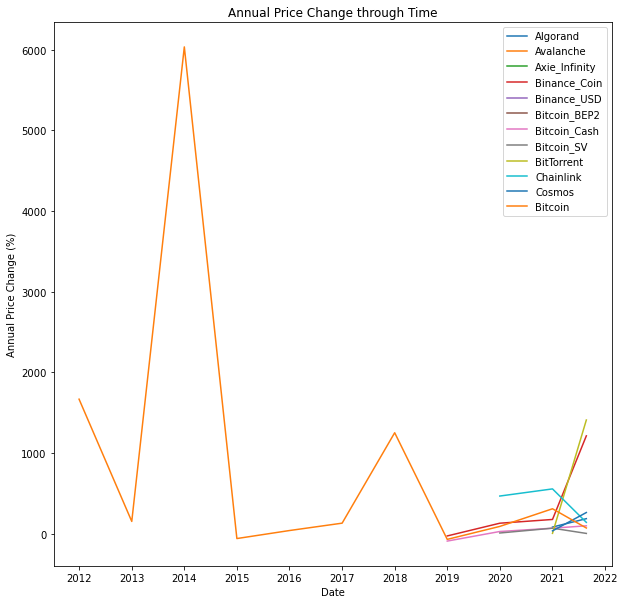

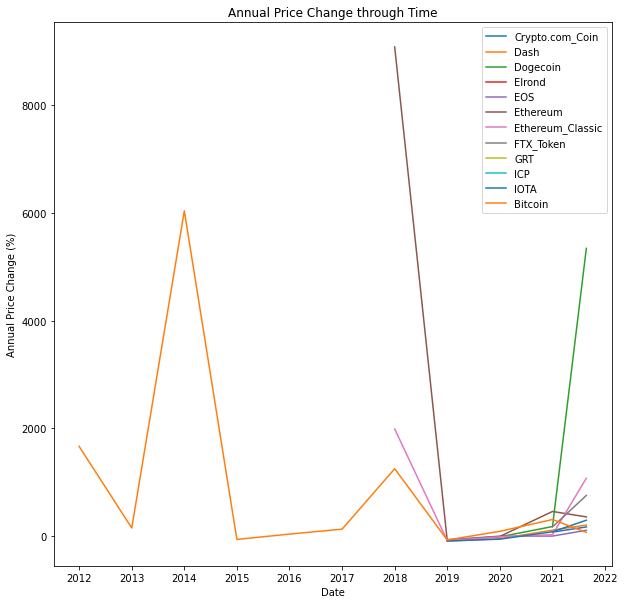

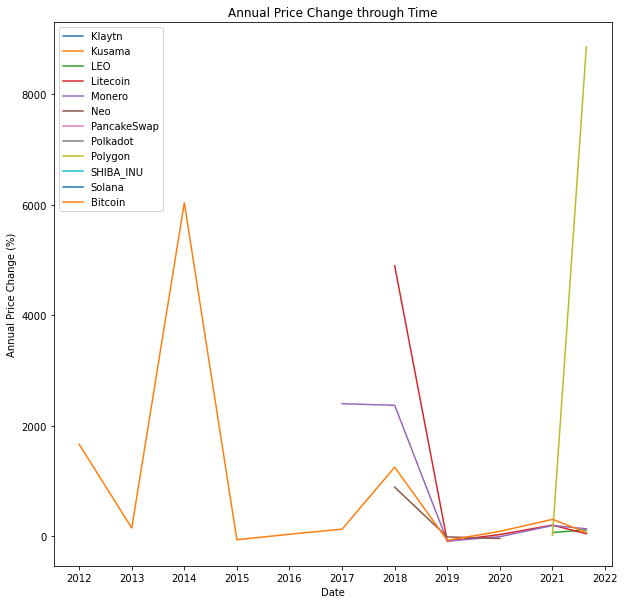

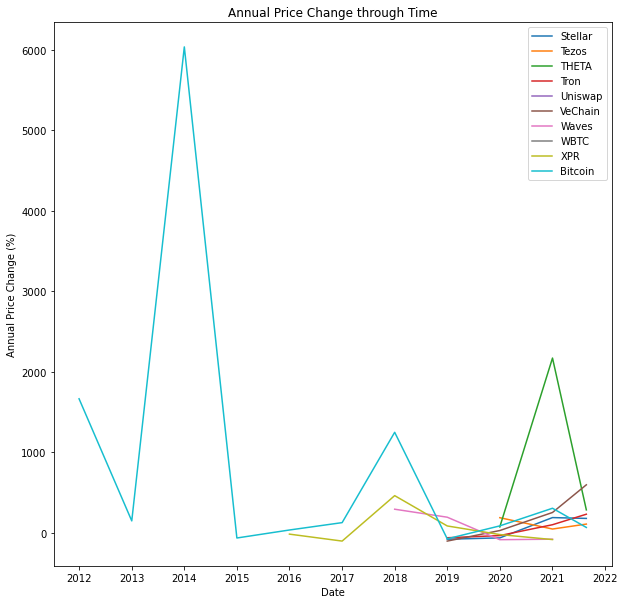

In [32]:
plt.figure(figsize=(10,10))
# plt.yscale('log')
for i in range(0,len(list_1)):
    x = crypto_data_ann[crypto_data_ann['Currency_Name'] == list_1[i]]
    plt.plot(x.Date, x.annual_dif)
plt.xlabel("Date")
plt.ylabel("Annual Price Change (%)")
plt.title('Annual Price Change through Time')
plt.legend(list_1)
plt.show()

plt.figure(figsize=(10,10))
# plt.yscale('log')
for i in range(0,len(list_2)):
    x = crypto_data_ann[crypto_data_ann['Currency_Name'] == list_2[i]]
    plt.plot(x.Date, x.annual_dif)
plt.xlabel("Date")
plt.ylabel("Annual Price Change (%)")
plt.title('Annual Price Change through Time')
plt.legend(list_2)
plt.show()

plt.figure(figsize=(10,10))
# plt.yscale('log')
for i in range(0,len(list_3)):
    x = crypto_data_ann[crypto_data_ann['Currency_Name'] == list_3[i]]
    plt.plot(x.Date, x.annual_dif)
plt.xlabel("Date")
plt.ylabel("Annual Price Change (%)")
plt.title('Annual Price Change through Time')
plt.legend(list_3)
plt.show()

plt.figure(figsize=(10,10))
# plt.yscale('log')
for i in range(0,len(list_4)):
    x = crypto_data_ann[crypto_data_ann['Currency_Name'] == list_4[i]]
    plt.plot(x.Date, x.annual_dif)
plt.xlabel("Date")
plt.ylabel("Annual Price Change (%)")
plt.title('Annual Price Change through Time')
plt.legend(list_4)
plt.show()

In [38]:
# from here, you can inspect the top 10 movers for each year; most of these tokens were created in either 2020 or 2021
crypto_ann_sorted = crypto_data_ann.sort_values(["Date", "annual_dif"], ascending = (False, False))

crypto_ann_sorted.head(50)

,Currency_Name,Date,Price,Open,High,Low,Vol.,annual_dif
39170,Polygon,2021-08-24,1.589810,1.623750,1.629720,1.579940,1.231000e+08,8851.632883
20118,Dogecoin,2021-08-24,0.307864,0.312884,0.314331,0.305952,2.110000e+09,5338.332450
39720,Solana,2021-08-24,78.038000,75.544000,79.272000,73.656000,1.747200e+05,4159.716157
11277,BitTorrent,2021-08-24,0.004435,0.004485,0.004532,0.004386,4.683000e+10,1408.503401
2274,Avalanche,2021-08-24,49.200000,46.430000,51.040000,44.250000,7.940000e+06,1247.945205
3693,Binance_Coin,2021-08-24,494.930000,499.790000,504.050000,491.410000,2.190000e+06,1212.115589
25873,Ethereum_Classic,2021-08-24,66.859800,68.277200,68.628800,66.782800,3.248000e+07,1074.606911
27786,FTX_Token,2021-08-24,49.663500,50.702000,51.041900,49.292300,1.984300e+05,755.087810
49631,VeChain,2021-08-24,0.133019,0.131613,0.136974,0.128505,1.380000e+08,598.665896
47225,Uniswap,2021-08-24,28.400000,28.795000,29.209000,28.290000,1.930000e+06,499.750808
